In [68]:
!pip install tensorflow-gpu

     |████████████████████████████████| 497.5 MB 28 kB/s 
     |████████████████████████████████| 462 kB 44.8 MB/s 


In [69]:
import tensorflow as tf

In [70]:
print(tf.__version__)

2.8.0


In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [72]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [73]:
X=df.iloc[:,3:13]
y=df.iloc[:,13]

In [74]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [75]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [76]:
#one hot encoding

In [77]:
geo=pd.get_dummies(X["Geography"],drop_first=True)

In [78]:
gender=pd.get_dummies(X["Gender"],drop_first=True)

In [79]:
#concat the dataframes 
X=pd.concat([X,geo,gender],axis=1)

In [80]:
#drop unnecessary columns 
X=X.drop(['Geography','Gender'],axis=1)

In [81]:
#splitting dataset into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [82]:
#feature scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [83]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [84]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [85]:
#preparing ANN 

In [86]:
from keras.layers import Dense

In [87]:
from keras.layers import LeakyReLU,PReLU,ELU

In [88]:
from keras.layers import Dropout

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout 

In [90]:
#Initilising ANN 
classifier=Sequential()

In [91]:
#adding input layer and 1st hidden layer
#units= decides no of units to give 
# activation fn = ReLU 
#kernel_initialiser=initial weights that has got initialsed (glorot uniform= initiases  uniformly)
classifier.add(Dense(units=11,activation='relu'))

In [92]:
#2nd layer 
classifier.add(Dense(units=11,activation='relu'))

In [93]:
#output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [94]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [95]:
X_train.shape

(8000, 11)

In [96]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=18,epochs=50)

Epoch 1/50
298/298 [==============================] - 3s 7ms/step - loss: 0.5147 - accuracy: 0.7832 - val_loss: 0.4759 - val_accuracy: 0.7955
Epoch 2/50
298/298 [==============================] - 2s 7ms/step - loss: 0.4545 - accuracy: 0.7968 - val_loss: 0.4517 - val_accuracy: 0.7963
Epoch 3/50
298/298 [==============================] - 2s 8ms/step - loss: 0.4318 - accuracy: 0.8102 - val_loss: 0.4342 - val_accuracy: 0.8114
Epoch 4/50
298/298 [==============================] - 3s 9ms/step - loss: 0.4174 - accuracy: 0.8225 - val_loss: 0.4253 - val_accuracy: 0.8126
Epoch 5/50
298/298 [==============================] - 2s 8ms/step - loss: 0.4070 - accuracy: 0.8281 - val_loss: 0.4176 - val_accuracy: 0.8186
Epoch 6/50
298/298 [==============================] - 3s 9ms/step - loss: 0.3980 - accuracy: 0.8306 - val_loss: 0.4109 - val_accuracy: 0.8183
Epoch 7/50
298/298 [==============================] - 3s 9ms/step - loss: 0.3894 - accuracy: 0.8339 - val_loss: 0.4027 - val_accuracy: 0.8220
Epoch 

In [97]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


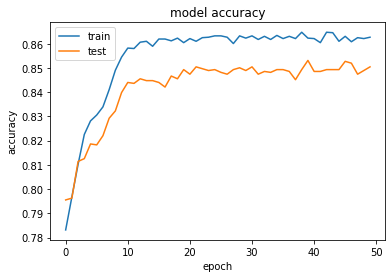

In [98]:
#history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

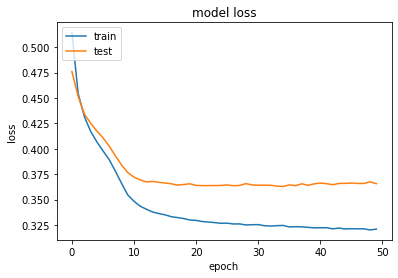

In [99]:
#history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [100]:
#predicting and evaluating models 

In [101]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

In [102]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [103]:
#confusion matrix 
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(y_test, y_pred)
cm 

array([[1528,   67],
       [ 209,  196]])

In [104]:
#accuracy calculator 
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.862